# Retail Strategy and Analytics - Task 1
## Data Preparation & Customer Analytics
This task include the data insights and strategy task using R. <br><br>
There are 5 parts for this task:<br><br>
1. Libraries & Datasets Loaded
2. Exploratory Data Analysis
3. Data Analysis on Customer Segments
4. Insights for Specific Customer Segments
5. Conclusion

## 1. Libraries & Datasets Loaded

In [1]:
install.packages('ggplot2')
install.packages('ggmosaic')
install.packages('rlang')

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Windows\Temp\RtmpwDjzBR\downloaded_packages
package 'ggmosaic' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Windows\Temp\RtmpwDjzBR\downloaded_packages
package 'rlang' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Windows\Temp\RtmpwDjzBR\downloaded_packages


In [2]:
library(data.table)
library(ggplot2)
library(ggmosaic)
library(readr)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggmosaic' was built under R version 3.6.3"

In [3]:
transactionData <- fread("QVI_transaction_data.csv")
customerData <- fread("QVI_purchase_behaviour.csv")

## 2. Exploratory Data Analysis
In this part, we need to understand the data. Let's take a look at each of the datasets provided.

In [4]:
str(transactionData)

Classes 'data.table' and 'data.frame':	264836 obs. of  8 variables:
 $ DATE          : int  43390 43599 43605 43329 43330 43604 43601 43601 43332 43330 ...
 $ STORE_NBR     : int  1 1 1 2 2 4 4 4 5 7 ...
 $ LYLTY_CARD_NBR: int  1000 1307 1343 2373 2426 4074 4149 4196 5026 7150 ...
 $ TXN_ID        : int  1 348 383 974 1038 2982 3333 3539 4525 6900 ...
 $ PROD_NBR      : int  5 66 61 69 108 57 16 24 42 52 ...
 $ PROD_NAME     : chr  "Natural Chip        Compny SeaSalt175g" "CCs Nacho Cheese    175g" "Smiths Crinkle Cut  Chips Chicken 170g" "Smiths Chip Thinly  S/Cream&Onion 175g" ...
 $ PROD_QTY      : int  2 3 2 5 3 1 1 1 1 2 ...
 $ TOT_SALES     : num  6 6.3 2.9 15 13.8 5.1 5.7 3.6 3.9 7.2 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [5]:
transactionData$DATE <- as.Date(transactionData$DATE, origin = "1899-12-30")

In [6]:
transactionData[, .N, PROD_NAME]

PROD_NAME,N
Natural Chip Compny SeaSalt175g,1468
CCs Nacho Cheese 175g,1498
Smiths Crinkle Cut Chips Chicken 170g,1484
Smiths Chip Thinly S/Cream&Onion 175g,1473
Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
Old El Paso Salsa Dip Tomato Mild 300g,3085
Smiths Crinkle Chips Salt & Vinegar 330g,3197
Grain Waves Sweet Chilli 210g,3167
Doritos Corn Chip Mexican Jalapeno 150g,3204
Grain Waves Sour Cream&Chives 210G,3105


In [7]:
productWords <- data.table(unlist(strsplit(unique(transactionData[, PROD_NAME]), " ")))
setnames(productWords, 'words')

In [8]:
productWords <- productWords[grepl("\\d", words) == FALSE, ]
productWords <- productWords[grepl("[:alpha:]", words), ]
productWords[, .N, words][order(N, decreasing = TRUE)]

words,N
Chips,21
Smiths,16
Crinkle,14
Kettle,13
Cheese,12
Salt,12
Original,10
Chip,9
Salsa,9
Pringles,8


In [9]:
summary(transactionData)

      DATE              STORE_NBR     LYLTY_CARD_NBR        TXN_ID       
 Min.   :2018-07-01   Min.   :  1.0   Min.   :   1000   Min.   :      1  
 1st Qu.:2018-09-30   1st Qu.: 70.0   1st Qu.:  70021   1st Qu.:  67602  
 Median :2018-12-30   Median :130.0   Median : 130358   Median : 135138  
 Mean   :2018-12-30   Mean   :135.1   Mean   : 135550   Mean   : 135158  
 3rd Qu.:2019-03-31   3rd Qu.:203.0   3rd Qu.: 203094   3rd Qu.: 202701  
 Max.   :2019-06-30   Max.   :272.0   Max.   :2373711   Max.   :2415841  
    PROD_NBR       PROD_NAME            PROD_QTY         TOT_SALES      
 Min.   :  1.00   Length:264836      Min.   :  1.000   Min.   :  1.500  
 1st Qu.: 28.00   Class :character   1st Qu.:  2.000   1st Qu.:  5.400  
 Median : 56.00   Mode  :character   Median :  2.000   Median :  7.400  
 Mean   : 56.58                      Mean   :  1.907   Mean   :  7.304  
 3rd Qu.: 85.00                      3rd Qu.:  2.000   3rd Qu.:  9.200  
 Max.   :114.00                      Max.   

In [10]:
transactionData[PROD_QTY == 200,]

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650
2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650


In [11]:
transactionData[LYLTY_CARD_NBR == 226000, ]

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650
2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650


In [12]:
transactionData <- transactionData[LYLTY_CARD_NBR != 226000, ]

In [13]:
summary(transactionData)

      DATE              STORE_NBR     LYLTY_CARD_NBR        TXN_ID       
 Min.   :2018-07-01   Min.   :  1.0   Min.   :   1000   Min.   :      1  
 1st Qu.:2018-09-30   1st Qu.: 70.0   1st Qu.:  70021   1st Qu.:  67601  
 Median :2018-12-30   Median :130.0   Median : 130357   Median : 135137  
 Mean   :2018-12-30   Mean   :135.1   Mean   : 135549   Mean   : 135158  
 3rd Qu.:2019-03-31   3rd Qu.:203.0   3rd Qu.: 203094   3rd Qu.: 202700  
 Max.   :2019-06-30   Max.   :272.0   Max.   :2373711   Max.   :2415841  
    PROD_NBR       PROD_NAME            PROD_QTY       TOT_SALES     
 Min.   :  1.00   Length:264834      Min.   :1.000   Min.   : 1.500  
 1st Qu.: 28.00   Class :character   1st Qu.:2.000   1st Qu.: 5.400  
 Median : 56.00   Mode  :character   Median :2.000   Median : 7.400  
 Mean   : 56.58                      Mean   :1.906   Mean   : 7.299  
 3rd Qu.: 85.00                      3rd Qu.:2.000   3rd Qu.: 9.200  
 Max.   :114.00                      Max.   :5.000   Max.   :2

In [14]:
transactionData[, .N, by = DATE]

DATE,N
2018-10-17,732
2019-05-14,758
2019-05-20,754
2018-08-17,711
2018-08-18,737
2019-05-19,779
2019-05-16,720
2018-08-20,693
2019-05-17,698
2019-05-18,679


In [15]:
allDates <- data.table(seq(as.Date("2018/07/01"), as.Date("2019/06/30"), by = "day"))
setnames(allDates, "DATE")
transactions_by_day <- merge(allDates, transactionData[, .N, by = DATE], all.x = TRUE)

In [16]:
theme_set(theme_bw())
theme_update(plot.title = element_text(hjust = 0.5))

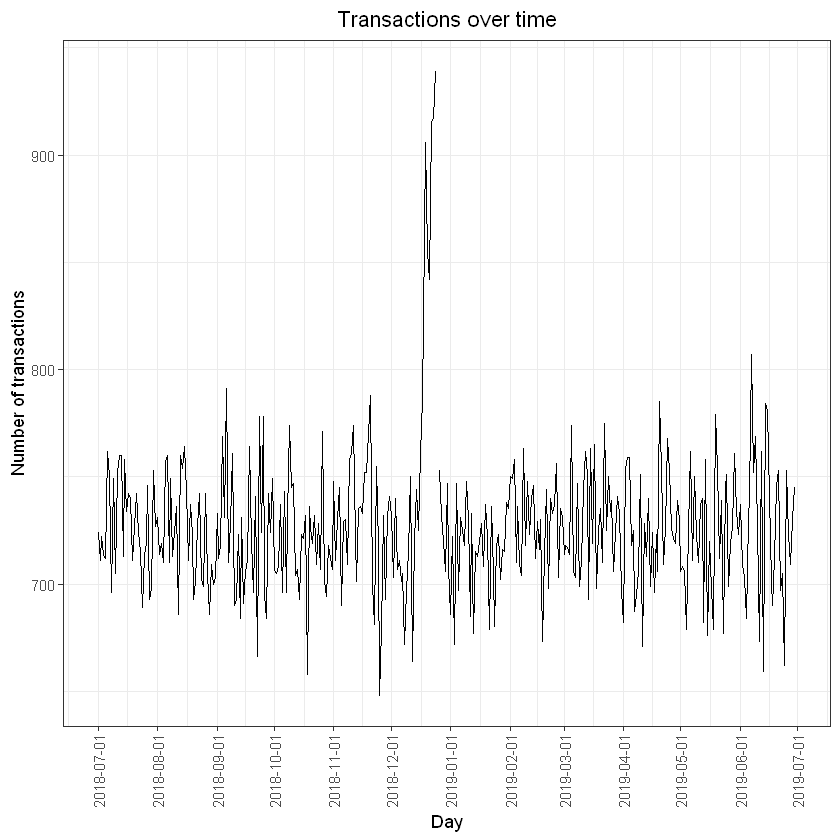

In [17]:
ggplot(transactions_by_day, aes(x = DATE, y = N)) + geom_line() +
labs(x = "Day", y = "Number of transactions", title = "Transactions over time") +
scale_x_date(breaks = "1 month") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

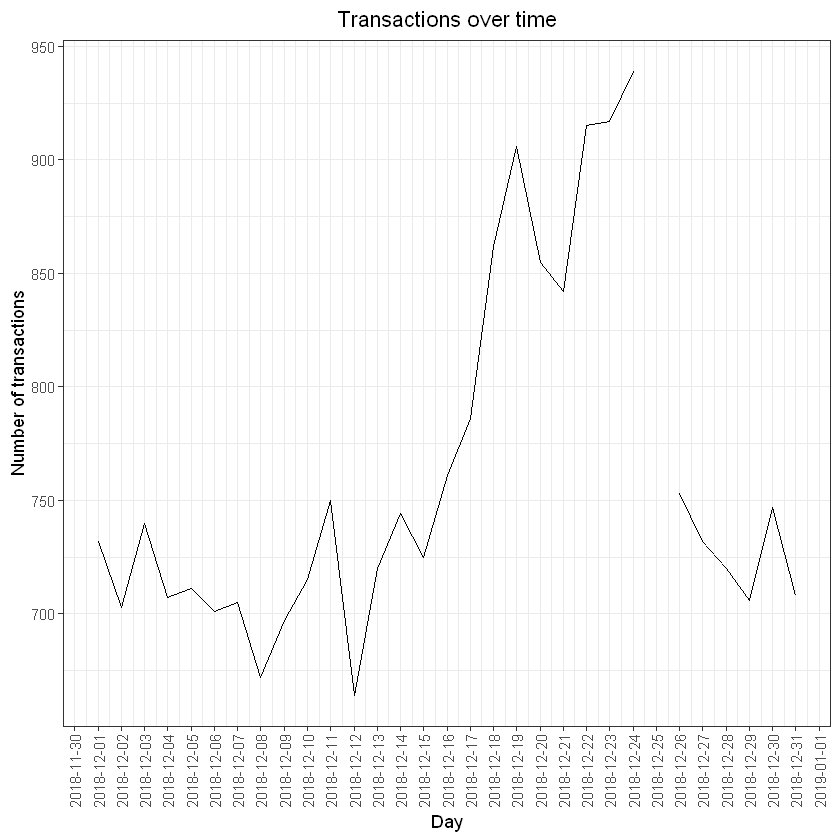

In [18]:
ggplot(transactions_by_day[month(DATE) == 12, ], aes(x = DATE, y = N)) + geom_line() +
labs(x = "Day", y = "Number of transactions", title = "Transactions over time") +
scale_x_date(breaks = "1 day") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

In [19]:
transactionData[, PACK_SIZE := parse_number(PROD_NAME)]
transactionData[, .N, PACK_SIZE][order(PACK_SIZE)]

PACK_SIZE,N
70,1507
90,3008
110,22387
125,1454
134,25102
135,3257
150,43131
160,2970
165,15297
170,19983


In [20]:
transactionData

DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300
2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330
2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,210
2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150
2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210


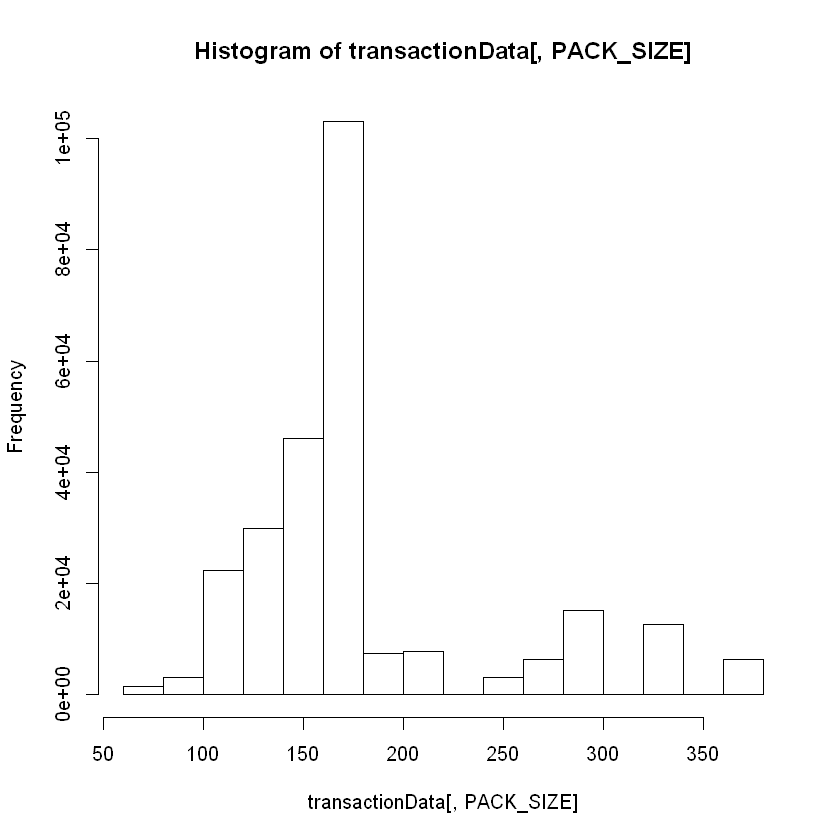

In [21]:
hist(transactionData[, PACK_SIZE])

In [22]:
transactionData[, BRAND := toupper(substr(PROD_NAME, 1, regexpr(pattern = ' ',PROD_NAME) - 1))]
transactionData[, .N, by = BRAND][order(-N)]

BRAND,N
KETTLE,41288
SMITHS,28860
PRINGLES,25102
DORITOS,24962
THINS,14075
RRD,11894
INFUZIONS,11057
WW,10320
COBS,9693
TOSTITOS,9471


In [23]:
transactionData[BRAND == "RED", BRAND := "RRD"]
transactionData[BRAND == "SNBTS", BRAND := "SUNBITES"]
transactionData[BRAND == "INFZNS", BRAND := "INFUZIONS"]
transactionData[BRAND == "WW", BRAND := "WOOLWORTHS"]
transactionData[BRAND == "SMITH", BRAND := "SMITHS"]
transactionData[BRAND == "NCC", BRAND := "NATURAL"]
transactionData[BRAND == "DORITO", BRAND := "DORITOS"]
transactionData[BRAND == "GRAIN", BRAND := "GRNWVES"]

In [24]:
transactionData[, .N, by = BRAND][order(BRAND)]

BRAND,N
BURGER,1564
CCS,4551
CHEETOS,2927
CHEEZELS,4603
COBS,9693
DORITOS,28145
FRENCH,1418
GRNWVES,7740
INFUZIONS,14201
KETTLE,41288


In [25]:
str(customerData)

Classes 'data.table' and 'data.frame':	72637 obs. of  3 variables:
 $ LYLTY_CARD_NBR  : int  1000 1002 1003 1004 1005 1007 1009 1010 1011 1012 ...
 $ LIFESTAGE       : chr  "YOUNG SINGLES/COUPLES" "YOUNG SINGLES/COUPLES" "YOUNG FAMILIES" "OLDER SINGLES/COUPLES" ...
 $ PREMIUM_CUSTOMER: chr  "Premium" "Mainstream" "Budget" "Mainstream" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [26]:
summary(customerData)

 LYLTY_CARD_NBR     LIFESTAGE         PREMIUM_CUSTOMER  
 Min.   :   1000   Length:72637       Length:72637      
 1st Qu.:  66202   Class :character   Class :character  
 Median : 134040   Mode  :character   Mode  :character  
 Mean   : 136186                                        
 3rd Qu.: 203375                                        
 Max.   :2373711                                        

In [27]:
customerData[, .N, by = LIFESTAGE][order(-N)]

LIFESTAGE,N
RETIREES,14805
OLDER SINGLES/COUPLES,14609
YOUNG SINGLES/COUPLES,14441
OLDER FAMILIES,9780
YOUNG FAMILIES,9178
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549


In [28]:
customerData[, .N, by = PREMIUM_CUSTOMER][order(-N)]

PREMIUM_CUSTOMER,N
Mainstream,29245
Budget,24470
Premium,18922


In [29]:
data <- merge(transactionData, customerData, all.x = TRUE)

In [30]:
data[is.null(LIFESTAGE), .N]

[1] 0

In [31]:
data[is.null(PREMIUM_CUSTOMER), .N]

[1] 0

## 3. Data Analysis on Customer Segments
We have already cleaned and managed our data, now we can define some metrics of interest to the client:
1. Who spends the most on chips, describe customers by lifestage and how premium their general purchasing beviour is?
2. How many customers are in each segment?
3. How many chips are bought per customer by segment?
4. What's the average chip price by customer segment?

In [32]:
sales <- data[, .(SALES = sum(TOT_SALES)), .(LIFESTAGE, PREMIUM_CUSTOMER)]

In [33]:
p <- ggplot(data = sales) +
geom_mosaic(aes(weight = SALES, x = product(PREMIUM_CUSTOMER, LIFESTAGE),fill = PREMIUM_CUSTOMER)) +
labs(x = "Lifestage", y = "Premium customer flag", title = "Proportion of sales") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

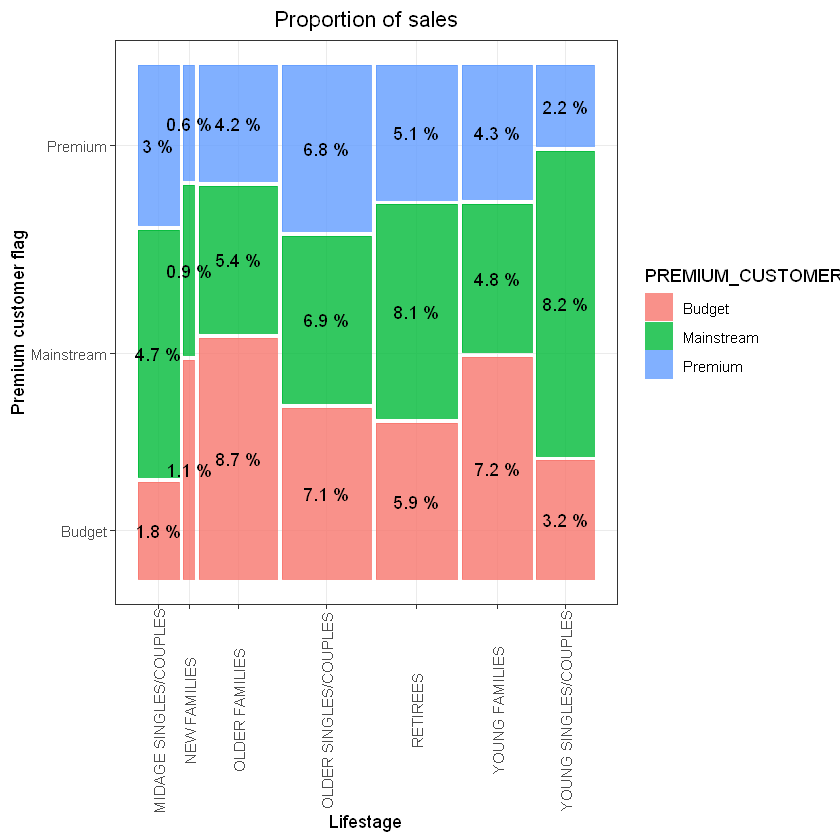

In [34]:
p + geom_text(data = ggplot_build(p)$data[[1]], aes(x = (xmin + xmax)/2 ,
y = (ymin + ymax)/2, label = as.character(paste(round(.wt/sum(.wt),3)*100,'%'))))

In [38]:
customers <- data[, .(CUSTOMERS = uniqueN(LYLTY_CARD_NBR)), .(LIFESTAGE,
PREMIUM_CUSTOMER)][order(-CUSTOMERS)]

In [39]:
p <- ggplot(data = customers) +
geom_mosaic(aes(weight = CUSTOMERS, x = product(PREMIUM_CUSTOMER,
LIFESTAGE), fill = PREMIUM_CUSTOMER)) +
labs(x = "Lifestage", y = "Premium customer flag", title = "Proportion of customers") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

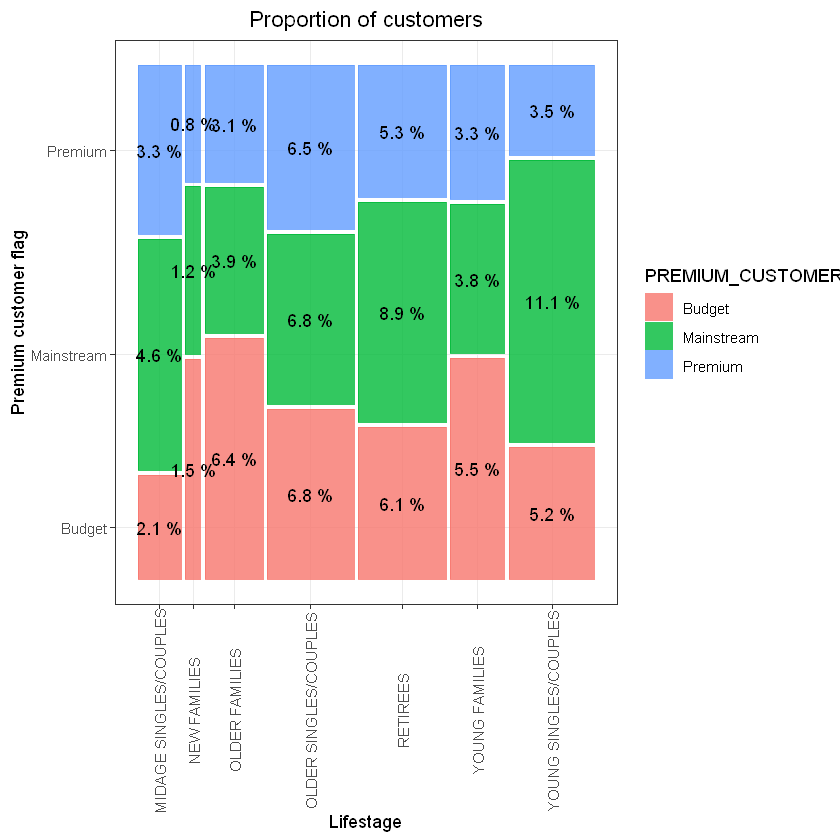

In [40]:
p + geom_text(data = ggplot_build(p)$data[[1]], aes(x = (xmin + xmax)/2 , y =
(ymin + ymax)/2, label = as.character(paste(round(.wt/sum(.wt),3)*100,'%'))))

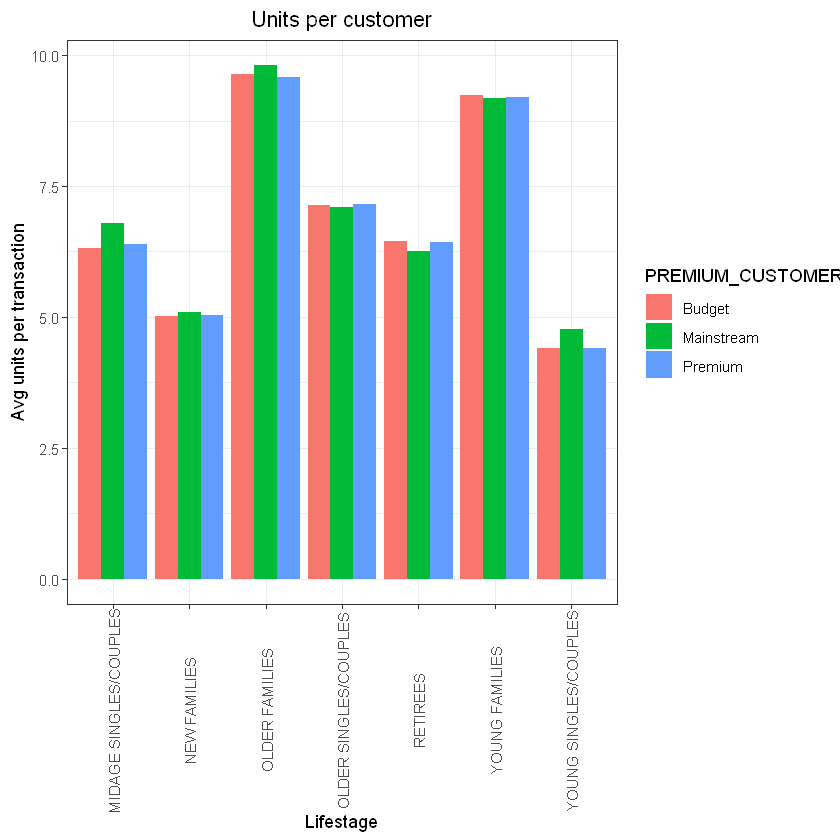

In [42]:
avg_units <- data[, .(AVG = sum(PROD_QTY)/uniqueN(LYLTY_CARD_NBR)),
                  .(LIFESTAGE, PREMIUM_CUSTOMER)][order(- AVG)]


ggplot(data = avg_units, aes(weight = AVG, x = LIFESTAGE, fill = PREMIUM_CUSTOMER)) + 
geom_bar(position = position_dodge()) + 
labs(x = "Lifestage", y = "Avg units per transaction", title = "Units per customer") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

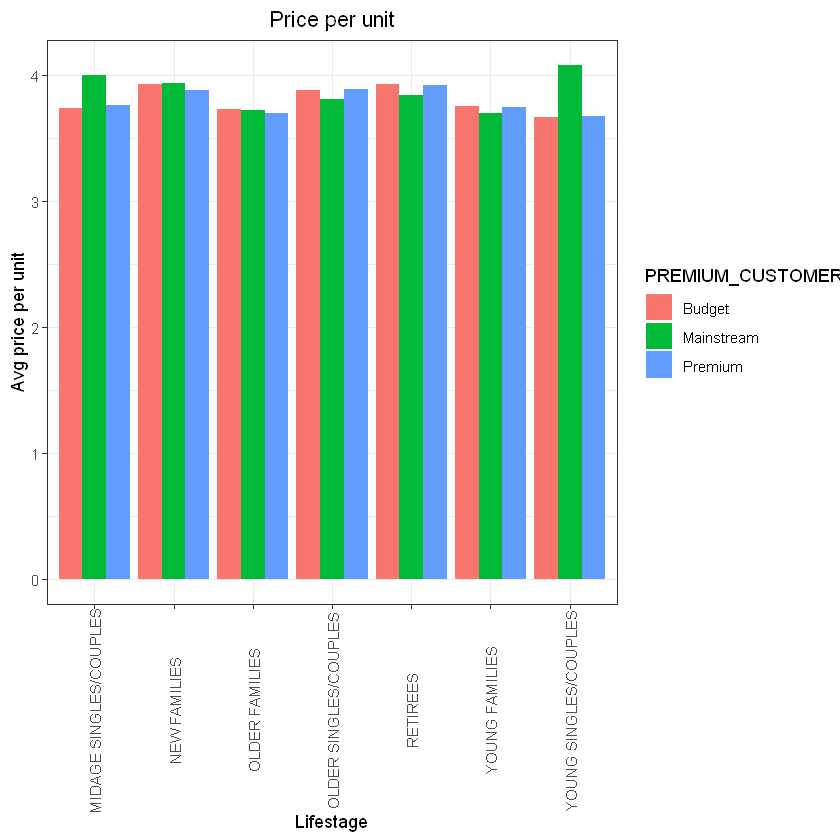

In [43]:
avg_price <- data[, .(AVG = sum(TOT_SALES)/sum(PROD_QTY)), .(LIFESTAGE, PREMIUM_CUSTOMER)][order(-AVG)]


ggplot(data = avg_price, aes(weight = AVG, x = LIFESTAGE, fill = PREMIUM_CUSTOMER)) +
geom_bar(position = position_dodge()) +
labs(x = "Lifestage", y = "Avg price per unit", title = "Price per unit") +
theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

In [45]:
pricePerUnit <- data[, price := TOT_SALES/PROD_QTY]
t.test(data[LIFESTAGE %in% c("YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES")
& PREMIUM_CUSTOMER == "Mainstream", price]
, data[LIFESTAGE %in% c("YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES")
& PREMIUM_CUSTOMER != "Mainstream", price], alternative = "greater")


	Welch Two Sample t-test

data:  data[LIFESTAGE %in% c("YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES") &  and data[LIFESTAGE %in% c("YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES") &     PREMIUM_CUSTOMER == "Mainstream", price] and     PREMIUM_CUSTOMER != "Mainstream", price]
t = 40.61, df = 58792, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.3429435       Inf
sample estimates:
mean of x mean of y 
 4.045586  3.688165 


## 4. Insights for Specific Customer Segments
In this part we will dive into few interesting insights that we found in Part3.<br><br>
We will target customer segments that contribute the most tosalws toretain them or further increase sales. Let's look at $Mainstream-young singles/couples$. Let's find out if they tend to buy a particular brand of chips.

In [47]:
segment1 <- data[LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream",]
other <- data[!(LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream"),]

In [50]:
quantity_segment1 <- segment1[, sum(PROD_QTY)]

quantity_other <- other[, sum(PROD_QTY)]

quantity_segment1_by_brand <- segment1[, .(targetSegment = sum(PROD_QTY)/quantity_segment1), by = BRAND]

quantity_other_by_brand <- other[, .(other = sum(PROD_QTY)/quantity_other), by = BRAND]

brand_proportions <- merge(quantity_segment1_by_brand, 
                           quantity_other_by_brand)[, affinityToBrand := targetSegment/other]

brand_proportions[order(-affinityToBrand)]

BRAND,targetSegment,other,affinityToBrand
TYRRELLS,0.029586871,0.023933043,1.2362352
TWISTIES,0.043306068,0.035282734,1.2274011
KETTLE,0.185649203,0.154216335,1.2038232
TOSTITOS,0.042581280,0.035377136,1.2036384
OLD,0.041597639,0.034752796,1.1969581
PRINGLES,0.111979706,0.093743295,1.1945356
DORITOS,0.122877407,0.105277499,1.1671764
COBS,0.041856492,0.036374793,1.1507005
INFUZIONS,0.060649203,0.053156887,1.1409472
THINS,0.056611100,0.053083941,1.0664449


In [51]:
quantity_segment1_by_pack <- segment1[, .(targetSegment = sum(PROD_QTY)/quantity_segment1), by = PACK_SIZE]

quantity_other_by_pack <- other[, .(other = sum(PROD_QTY)/quantity_other), by = PACK_SIZE]

pack_proportions <- merge(quantity_segment1_by_pack, 
                          quantity_other_by_pack)[,affinityToPack := targetSegment/other]

pack_proportions[order(-affinityToPack)]

PACK_SIZE,targetSegment,other,affinityToPack
270,0.029845724,0.023377359,1.2766936
380,0.030156347,0.023832205,1.2653612
330,0.057465314,0.046726826,1.2298142
134,0.111979706,0.093743295,1.1945356
110,0.099658314,0.083642285,1.1914824
210,0.027308967,0.023400959,1.1670020
135,0.013848623,0.012179999,1.1369971
250,0.013460344,0.011905375,1.1306107
170,0.075740319,0.075440042,1.0039803
300,0.054954442,0.057263373,0.9596787


In [52]:
data[PACK_SIZE == 270, unique(PROD_NAME)]

[1] "Twisties Cheese     270g" "Twisties Chicken270g"

## 5. Conclusion

##### Let's see what we found!!
Sales have mainly been due to $Budget - older$ families, $Mainstream - young singles/couples$, and $Mainstream - retirees$ shoppers.<br><br>
We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.<br><br>
We’ve also found that Mainstream young singles and couples are $23%$ more likely to purchase Tyrrells chips compared to the rest of the population. <br><br>
The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.<br><br>